### === Task ===

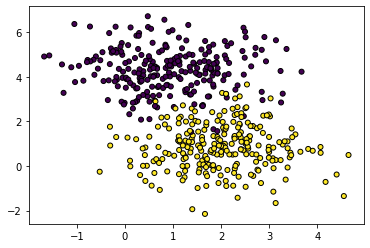

In [1]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(n_samples=500, centers=2, n_features=2,
                  random_state=0)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

1. Put everything into a class called LogisticRegression. The training method should be "minibatch".

2. Perform a classification on the data given above.

3. Plot training losses as number of iters increases.

4. Write a class called classification_report containing 4 functions (Accuracy, Recall, Precision, F1) and use it to evaluate your model.

In [46]:
# scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [47]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [48]:
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  # add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  # add intercept

In [49]:
class LogisticRegression:
    def __init__(self, learning_rate=0.0001, max_iter=10000, batch_size=64):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.batch_size = batch_size
        self.loss_old = np.inf
    
    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        self.losses = []
        
        for i in range(self.max_iter):
            index = np.random.randint(0, X.shape[0])
            batch_X = X[index:index + self.batch_size]
            batch_y = y[index:index + self.batch_size]
            loss, grad = self.gradient(batch_X, batch_y)
            if i % 500 == 0:
                print(f"Loss at iteration {i}", loss)
                self.losses.append(loss)
            self.w = self.w - self.learning_rate * grad
            
    def gradient(self, X, y):
        m = X.shape[0]
        h = self.h_theta(X)
        error = h - y
        # putting negative sign for negative log likelihood
        loss = - np.sum(y * np.log(h) + (1 - y) * np.log(1 - h)) * 1/m
        grad = np.dot(X.T, error)
        return loss, grad

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def h_theta(self, X):
        return self.sigmoid(X @ self.w)

    def predict(self, X_test):
        yhat = np.round(self.sigmoid(X_test @ self.w))
        return yhat
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()
        

Loss at iteration 0 0.6931471805599453
Loss at iteration 500 0.3652920949855771
Loss at iteration 1000 0.2723622118057543
Loss at iteration 1500 0.1741469935251743
Loss at iteration 2000 0.2560817696063622
Loss at iteration 2500 0.20784695017327193
Loss at iteration 3000 0.17784536344295657
Loss at iteration 3500 0.1393865788550453
Loss at iteration 4000 0.12504305020235973
Loss at iteration 4500 0.08638466575785098
Loss at iteration 5000 0.10902673715455374
Loss at iteration 5500 0.11631085307795491
Loss at iteration 6000 0.19034439437570574
Loss at iteration 6500 0.11432727092181978
Loss at iteration 7000 0.10253937412869843
Loss at iteration 7500 0.09415710659438184
Loss at iteration 8000 0.09556886316607603
Loss at iteration 8500 0.17098043164708954
Loss at iteration 9000 0.09345734205224637
Loss at iteration 9500 0.09230582487351653


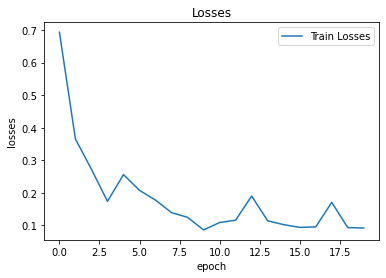

In [50]:
model = LogisticRegression(batch_size=64)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
model.plot()

In [51]:
class classification_reports():
    def __init__(self, actual, predicted):
        self.actual = actual
        self.predicted = predicted
        
        self.TP = sum((self.actual == 1) & (self.predicted == 1))
        self.TN = sum((self.actual == 0) & (self.predicted == 0))
        self.FN = sum((self.actual == 1) & (self.predicted == 0))
        self.FP = sum((self.actual == 0) & (self.predicted == 1))
        
    def accuracy(self):
        self.acc = 100 * (self.TP + self.TN) / (self.TP + self.TN + self.FN + self.FP)
        return self.acc
    
    def recall(self):
        self.recall = self.TP / (self.TP + self.FN)
        return self.recall
    
    def precision(self):
        self.precision = self.TP / (self.TP + self.FP)
        return self.precision
    
    def f1(self):
        self.f1 = 2 * self.precision * self.recall / (self.precision + self.recall)
        return self.f1

In [52]:
report = classification_reports(y_test, yhat)
print(f"Accuracy: {report.accuracy()}")
print(f"Recall: {report.recall()}")
print(f"Precision: {report.precision()}")
print(f"F1: {report.f1()}")


Accuracy: 98.66666666666667
Recall: 0.9876543209876543
Precision: 0.9876543209876543
F1: 0.9876543209876543
